### Importing Packages

In [37]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 
from scipy.stats import pearsonr

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#Add Extra Modules
from math import sin, cos, sqrt, atan2
from datetime import datetime, timedelta
#import cpi
import re



# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.display.max_columns = None
pd.options.display.width = None

### Data Cleaning

In [38]:
# Loading in Data
housingRaw = pd.read_csv("data/kc_house_data.csv")
housingRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [39]:
# Dropping Rows with missing data in heat_source, sewer_system
cleaningDF = housingRaw.dropna()
# Converting YES and NO entries into Zeroes and Ones
cleaningDF['waterfront'] = cleaningDF['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
cleaningDF['greenbelt'] = cleaningDF['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
cleaningDF['nuisance'] = cleaningDF['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)
# Convert date to datetime object
cleaningDF['date'] = pd.to_datetime(cleaningDF['date'])

<ipython-input-39-87ec083a96b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['waterfront'] = cleaningDF['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
<ipython-input-39-87ec083a96b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['greenbelt'] = cleaningDF['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
<ipython-input-39-87ec083a96b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [40]:
cleaningDF['grade'] = cleaningDF['grade'].str.extract(r'(\d+)').astype(int)
cleaningDF['grade'].unique()

<ipython-input-40-4f3dab38453e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['grade'] = cleaningDF['grade'].str.extract(r'(\d+)').astype(int)


array([ 7,  9,  8,  6, 10,  5, 11, 12,  4, 13,  3,  2])

In [41]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
cleaningDF['condition'] = cleaningDF['condition'].map(condition_mapping)
cleaningDF['condition'].unique()

<ipython-input-41-e4715e3f645b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['condition'] = cleaningDF['condition'].map(condition_mapping)


array([4, 3, 5, 2, 1], dtype=int64)

In [42]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
cleaningDF['view'] = cleaningDF['view'].map(view_mapping)
cleaningDF['view'].unique()

<ipython-input-42-cf84d77951d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['view'] = cleaningDF['view'].map(view_mapping)


array([1, 3, 5, 2, 4], dtype=int64)

In [43]:
cleaningDF['date'] = pd.to_datetime(housingRaw['date'])

<ipython-input-43-cbce548c95f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['date'] = pd.to_datetime(housingRaw['date'])


### King's County Crime Dataframe

In [58]:
rawcrimeDF = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')
rawcrimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

In [59]:
# What we need
crimeDF = rawcrimeDF[['case_number','zip']]

### Feature Engineering

Create feature that finds distance from Amazon Headquarters in Seattle

In [44]:
# Function to define distance between two points on Earth
def haversine(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

# Amazon headquarters GPS location (Seattle city center)
city_lat = 47.6184
city_long = -122.3560

cleaningDF["distance"] = haversine(city_lat, city_long, cleaningDF["lat"], cleaningDF["long"])

<ipython-input-44-774d2f042cd5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF["distance"] = haversine(city_lat, city_long, cleaningDF["lat"], cleaningDF["long"])


Adjusting House Prices for Inflation

In [45]:
# We have to drop entries from our dataset that were sold after 2022, which is not many
cleaningDF = cleaningDF[housingRaw['date'] < '2022-01-01']
# Adjust rest of prices based on inflation
#cleaningDF['price'] = cleaningDF.apply(lambda row: cpi.inflate(row['price'],row['date'].year), axis=1)

<ipython-input-45-9de3712dd585>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaningDF = cleaningDF[housingRaw['date'] < '2022-01-01']


Extracting Zipcodes for engineering after test-train split.

In [63]:
# Extract Zipcode from Address Column
def extract_zipcode(address):
    zipcode = re.findall(r'\b\d{5}\b', address)
    if len(zipcode) > 0:
        return zipcode[0]
    else:
        return ''

cleaningDF['zip_code'] = cleaningDF['address'].apply(extract_zipcode)
cleaningDF['zip_code']

1        11231
3        98118
6        98166
13       98092
20       98007
         ...  
30146    98002
30147    98001
30149    98117
30150    98103
30153    17127
Name: zip_code, Length: 10183, dtype: object

Years Since Built or Renovated

In [47]:
cleaningDF['yr_sold'] = cleaningDF['date'].dt.year
cleaningDF['yr_renovated'] = np.where(cleaningDF['yr_renovated'] == 0, cleaningDF['yr_built'], cleaningDF['yr_renovated'])
cleaningDF['Years_Since_Update'] = cleaningDF['yr_sold'] - cleaningDF[['yr_built', 'yr_renovated']].min(axis=1)

Other Boolean Features

In [48]:
# Does house have a basement
cleaningDF['has_basement'] = (cleaningDF['sqft_basement'] > 0).astype(int)
# Does house have a patio
cleaningDF['has_patio'] = (cleaningDF['sqft_patio'] > 0).astype(int)
# Does house have a garage
cleaningDF['has_garage'] = (cleaningDF['sqft_garage'] > 0).astype(int)

Normalize Variables

In [49]:
# Log transform the columns 'price', 'sqft_living', and 'sqft_lot'
cleaningDF[['sqft_living', 'sqft_lot']] = np.log(cleaningDF[['sqft_living', 'sqft_lot']])

# Normalize the columns 'price_log', 'sqft_living_log', and 'sqft_lot_log'
cleaningDF[['sqft_living', 'sqft_lot']] = (cleaningDF[['sqft_living', 'sqft_lot']] - cleaningDF[['sqft_living', 'sqft_lot']].mean()) / cleaningDF[['sqft_living', 'sqft_lot']].std()

In [60]:
# Merge Crime Data to Dataframe
crimeCounts = crimeDF['zip'].value_counts()


98168    4939
98188    4832
98166    4559
98133    4476
98146    3663
         ... 
98206       1
98816       1
98447       1
98367       1
98252       1
Name: zip, Length: 184, dtype: int64

### Modeling Time!

Test-Train Split

In [50]:
columns_to_drop = ["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement',
                   'sqft_patio','sqft_garage', 'date','yr_built','yr_renovated']
train_data, test_data, train_labels, test_labels = train_test_split(cleaningDF.drop(columns=columns_to_drop),
                                                                    cleaningDF["price"], test_size=0.33, random_state=42)

More Feature Engineering

Mean Price by Zipcode

In [51]:
# First, calculate the mean price for each zip code
zip_code_prices_train = train_data.groupby('zip_code')['price'].mean()
zip_code_prices_test = test_data.groupby('zip_code')['price'].mean()
# Next, divide the zip codes into price categories based on their mean prices
zip_code_categories_train = pd.cut(zip_code_prices_train, bins=5, labels=False, retbins=False)
zip_code_categories_test = pd.cut(zip_code_prices_test, bins=5, labels=False, retbins=False)

# Finally, add the price category as a new column to the train and test dataframes
train_data['zip_code_category'] = train_data['zip_code'].map(zip_code_categories_train)
test_data['zip_code_category'] = test_data['zip_code'].map(zip_code_categories_test)
train_data.drop(['zip_code'], axis=1, inplace=True)
test_data.drop(['zip_code'], axis=1, inplace=True)

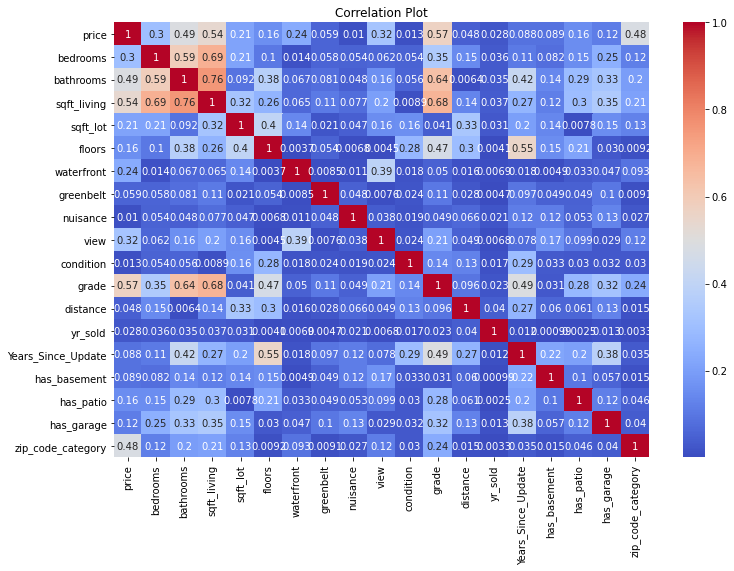

In [52]:
# Calculate the correlation matrix
corr = abs(train_data.corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

In [1132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12904 entries, 17530 to 24757
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       12904 non-null  float64
 1   bedrooms                    12904 non-null  int64  
 2   bathrooms                   12904 non-null  float64
 3   sqft_living                 12904 non-null  float64
 4   sqft_lot                    12904 non-null  float64
 5   floors                      12904 non-null  float64
 6   waterfront                  12904 non-null  int64  
 7   greenbelt                   12904 non-null  int64  
 8   nuisance                    12904 non-null  int64  
 9   view                        12904 non-null  int64  
 10  condition                   12904 non-null  int64  
 11  grade                       12904 non-null  int32  
 12  distance                    12904 non-null  float64
 13  zip_code_category          

#### Baseline Model

In [55]:
X = train_data['grade']
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     3248.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:50:28   Log-Likelihood:            -1.0157e+05
No. Observations:                6822   AIC:                         2.032e+05
Df Residuals:                    6820   BIC:                         2.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.205e+06    5.8e+04    -38.001      0.0

In [1134]:
train_data.drop(['bathrooms', 'bedrooms'], axis=1, inplace=True)

test_data.drop(['bathrooms', 'bedrooms'], axis=1, inplace=True)

In [1135]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1212.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:33:14   Log-Likelihood:            -1.8953e+05
No. Observations:               12904   AIC:                         3.791e+05
Df Residuals:                   12889   BIC:                         3.792e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1136]:
train_data = train_data[train_data['distance'] <= 50]
train_data = train_data[train_data['price'] <= 3000000]

test_data = test_data[test_data['distance'] <= 50]
test_data = test_data[test_data['price'] <= 3000000]

In [57]:
vif = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif_df = pd.DataFrame({'Features': train_data.columns, 'VIF': vif})
vif_df.sort_values('VIF', ascending=False)

NameError: name 'variance_inflation_factor' is not defined

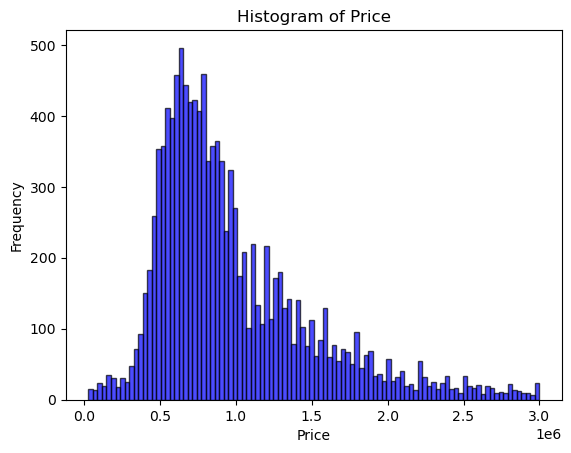

In [1138]:
plt.hist(train_data['price'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


In [1139]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:33:15   Log-Likelihood:            -1.6811e+05
No. Observations:               12006   AIC:                         3.362e+05
Df Residuals:                   11991   BIC:                         3.364e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1140]:
price = train_data['price']
distance = train_data['years_since_build_or_renov']
corr, _ = pearsonr(price, distance)
print('Pearson Correlation Coefficient: %.3f' % corr)

Pearson Correlation Coefficient: -0.110


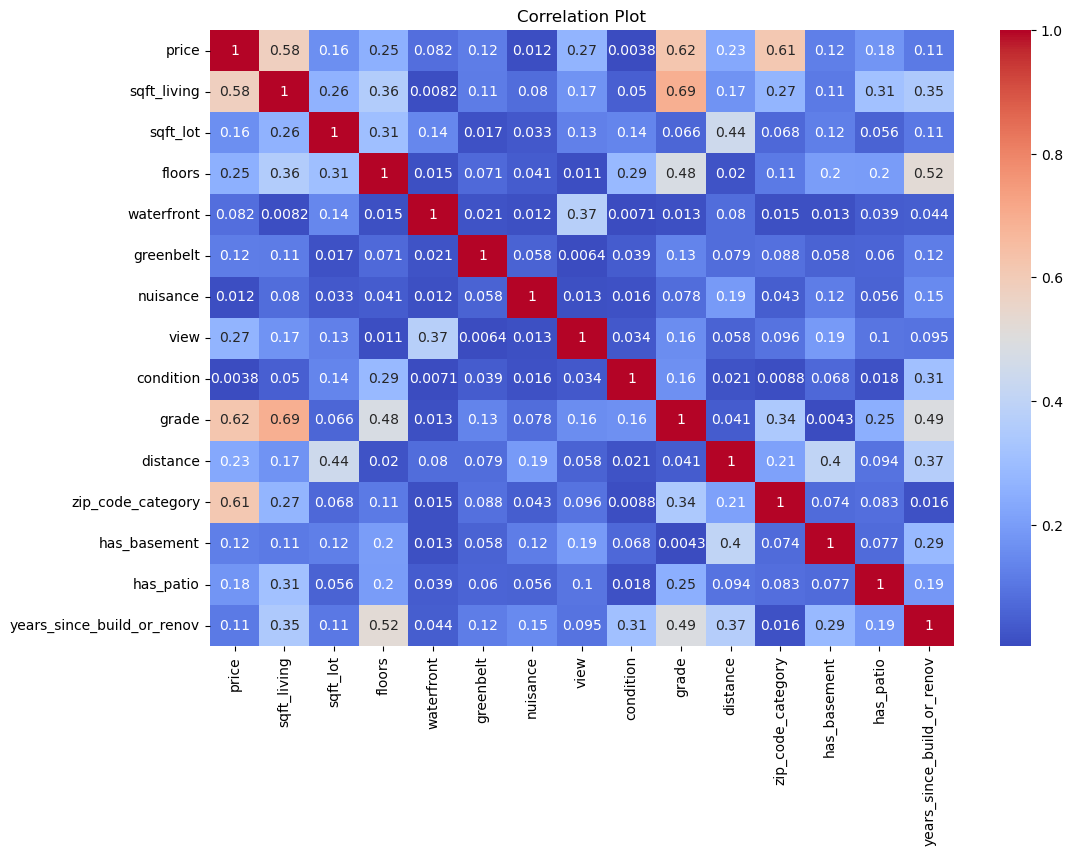

In [1141]:
# Calculate the correlation matrix
corr = abs(train_data.corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

In [1142]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:33:16   Log-Likelihood:            -1.6811e+05
No. Observations:               12006   AIC:                         3.362e+05
Df Residuals:                   11991   BIC:                         3.364e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

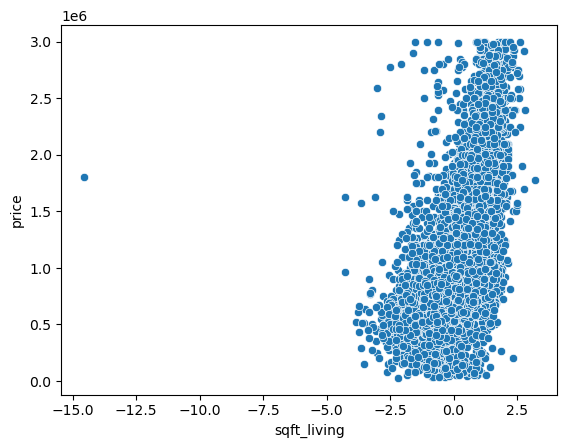

In [1143]:
sns.scatterplot(x='sqft_living', y='price', data=train_data)


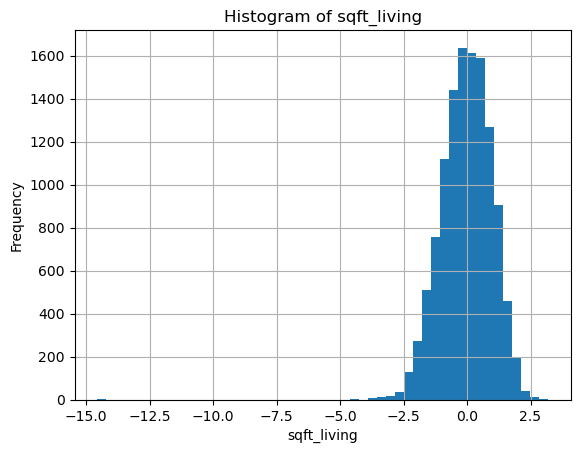

In [1144]:
train_data['sqft_living'].hist(bins=50)
plt.xlabel('sqft_living')
plt.ylabel('Frequency')
plt.title('Histogram of sqft_living')
plt.show()

In [1145]:
train_data.drop(["has_patio"], axis=1, inplace=True)
test_data.drop(["has_patio"], axis=1, inplace=True)

train_data.drop(["grade"], axis=1, inplace=True)
test_data.drop(["grade"], axis=1, inplace=True)

In [1146]:
test_data.describe()

,price,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,distance,zip_code_category,has_basement,years_since_build_or_renov
count,5.884000e+03,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000
mean,9.760008e+05,-0.013100,0.024739,1.508073,0.011897,0.022264,0.175901,1.259857,3.499150,19.914998,0.334126,0.490143,46.871346
std,5.185890e+05,0.932394,0.925945,0.544527,0.108430,0.147553,0.380768,0.800696,0.710165,11.417721,0.538680,0.499945,31.194110
min,2.830700e+04,-4.049789,-2.681708,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.744201,0.000000,0.000000,-1.000000
25%,6.200000e+05,-0.650710,-0.395514,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,10.039416,0.000000,0.000000,20.000000
50%,8.260000e+05,0.015758,-0.002874,1.500000,0.000000,0.000000,0.000000,1.000000,3.000000,17.784019,0.000000,0.000000,45.000000
75%,1.200000e+06,0.654247,0.320546,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,28.211693,1.000000,1.000000,67.250000
max,3.000000e+06,3.108201,5.699610,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,49.960621,4.000000,1.000000,121.000000


In [1147]:
train_data[['price', 'distance', 'years_since_build_or_renov']] = (train_data[['price', 'distance', 'years_since_build_or_renov']] - train_data[['price', 'distance', 'years_since_build_or_renov']].mean()) / train_data[['price', 'distance', 'years_since_build_or_renov']].std()

test_data[['price', 'distance', 'years_since_build_or_renov']] = (test_data[['price', 'distance', 'years_since_build_or_renov']] - test_data[['price', 'distance', 'years_since_build_or_renov']].mean()) / test_data[['price', 'distance', 'years_since_build_or_renov']].std()

In [1148]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1896.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:33:17   Log-Likelihood:                -10649.
No. Observations:               12006   AIC:                         2.132e+04
Df Residuals:                   11993   BIC:                         2.142e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

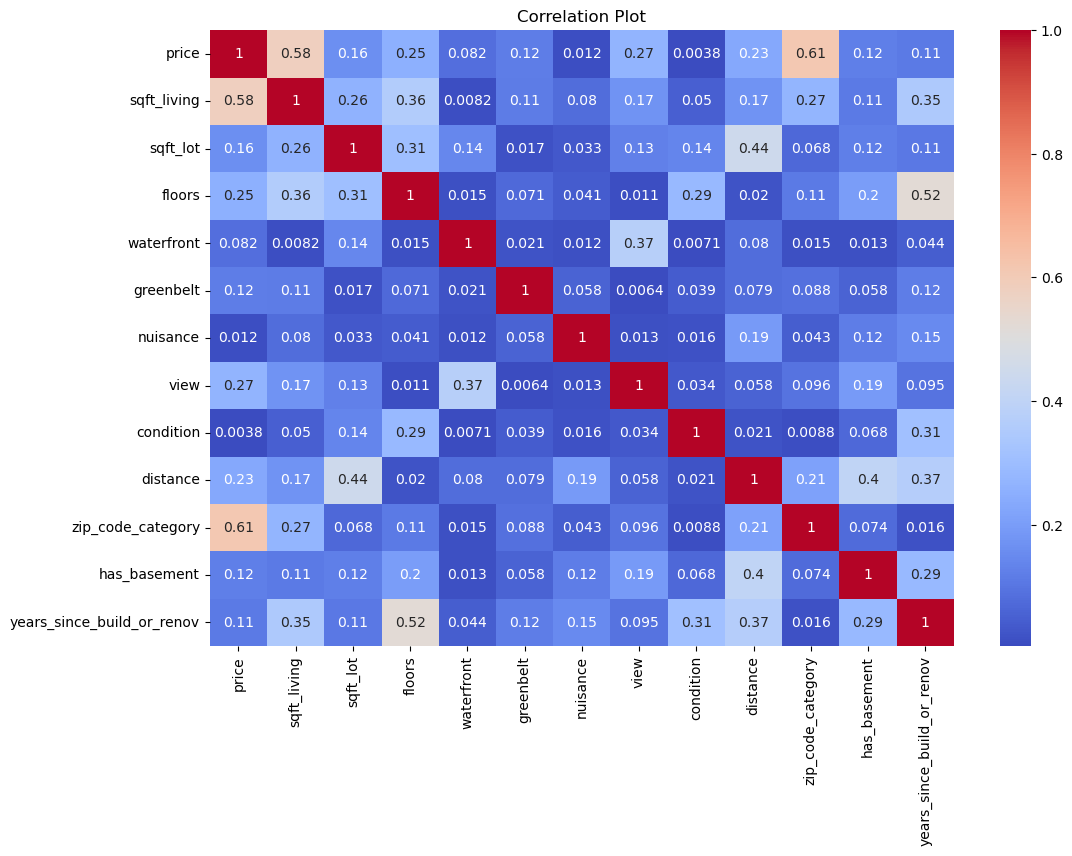

In [1149]:
# Calculate the correlation matrix
corr = abs(train_data.corr())

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Plot")

# Show the plot
plt.show()

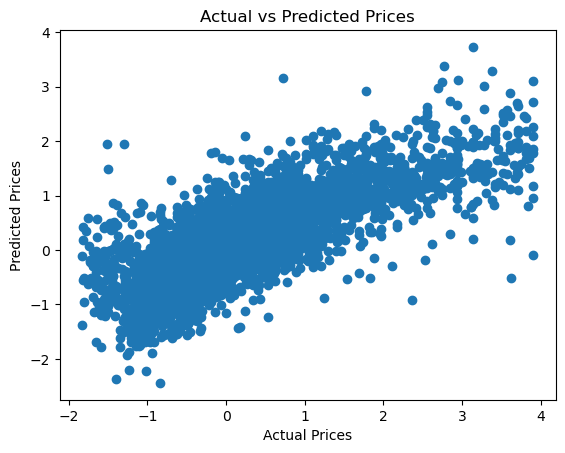

In [1150]:
# Fit the model to the training data
model = sm.OLS(train_data['price'], train_data.drop(['price'], axis=1))
results = model.fit()

# Use the fitted model to make predictions on the test data
y_hat_train = results.predict(train_data.drop(['price'], axis=1))
predictions = results.predict(test_data.drop(['price'], axis=1))

# Compare the predicted values with the actual prices in the test data
plt.scatter(test_data['price'], predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

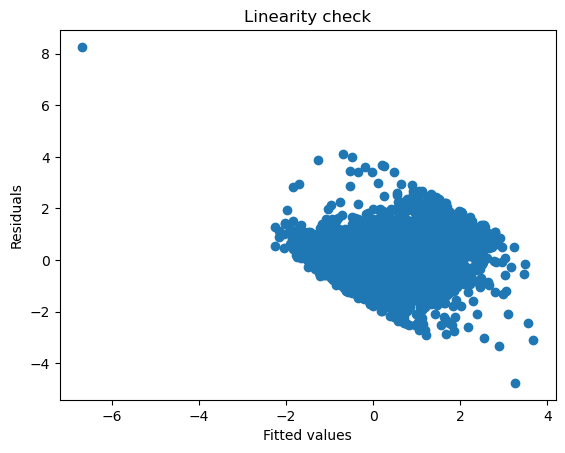

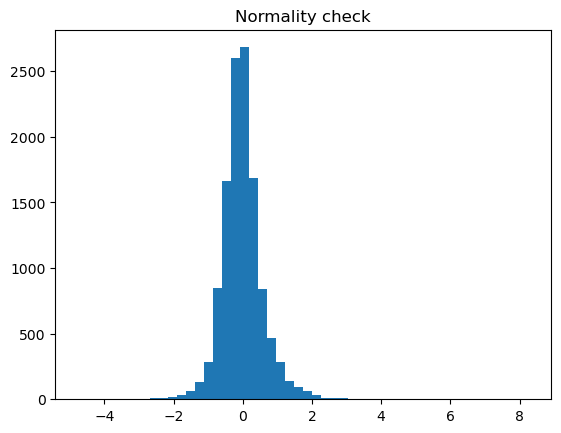

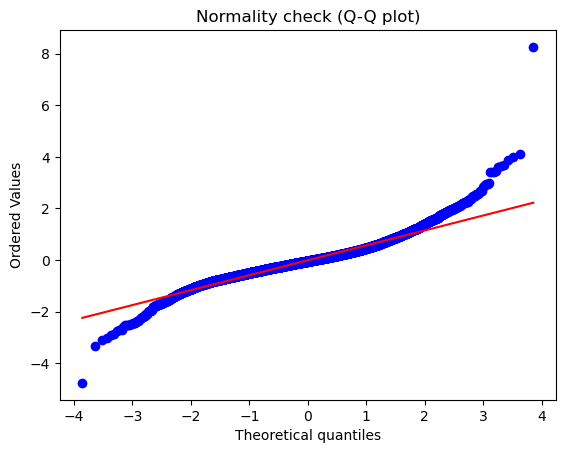

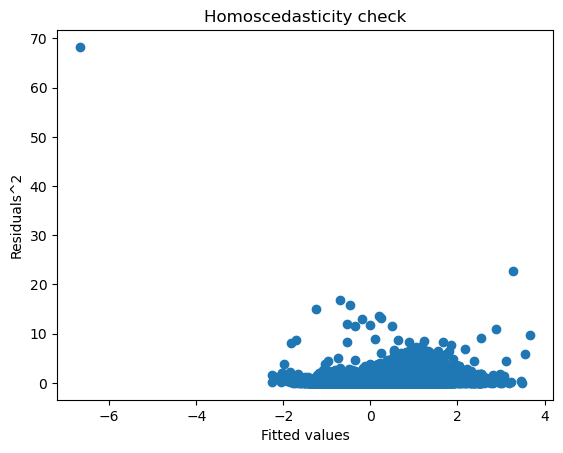

In [1151]:
# calculate the residuals
residuals = results.resid

# Plot the residuals against the fitted values to check for linearity
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normality check (Q-Q plot)")
plt.show()

# Plot the residuals against the fitted values to check for homoscedasticity
plt.scatter(results.fittedvalues, residuals**2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals^2")
plt.title("Homoscedasticity check")
plt.show()

In [1152]:
test_data.describe()

,price,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,distance,zip_code_category,has_basement,years_since_build_or_renov
count,5.884000e+03,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5.884000e+03,5884.000000,5884.000000,5.884000e+03
mean,8.966315e-17,-0.013100,0.024739,1.508073,0.011897,0.022264,0.175901,1.259857,3.499150,-5.410450e-15,0.334126,0.490143,-1.320607e-16
std,1.000000e+00,0.932394,0.925945,0.544527,0.108430,0.147553,0.380768,0.800696,0.710165,1.000000e+00,0.538680,0.499945,1.000000e+00
min,-1.827447e+00,-4.049789,-2.681708,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.679039e+00,0.000000,0.000000,-1.534628e+00
25%,-6.864795e-01,-0.650710,-0.395514,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-8.649346e-01,0.000000,0.000000,-8.614237e-01
50%,-2.892478e-01,0.015758,-0.002874,1.500000,0.000000,0.000000,0.000000,1.000000,3.000000,-1.866378e-01,0.000000,0.000000,-5.999036e-02
75%,4.319398e-01,0.654247,0.320546,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,7.266508e-01,1.000000,1.000000,6.532853e-01
max,3.902896e+00,3.108201,5.699610,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,2.631491e+00,4.000000,1.000000,2.376367e+00
